# NLP text classification using :
1-tfidf
2-knn
3-custom stop words
4-confusion metrics

In [1]:
import pandas as pd 
import numpy as np


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [7]:
v=TfidfVectorizer()

In [8]:
v.fit_transform(corpus)

<7x28 sparse matrix of type '<class 'numpy.float64'>'
	with 46 stored elements in Compressed Sparse Row format>

In [9]:
#let's print the idf of each word:

all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    
    #let's get the index in the vocabulary
    indx = v.vocabulary_.get(word)
    
    #get the score
    idf_score = v.idf_[indx]
    
    print(f"{word} : {idf_score}")

already : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
are : 2.386294361119891
ate : 2.386294361119891
biryani : 2.386294361119891
dot : 2.386294361119891
eating : 1.9808292530117262
eco : 2.386294361119891
google : 2.386294361119891
grapes : 2.386294361119891
iphone : 2.386294361119891
ironman : 2.386294361119891
is : 1.1335313926245225
loki : 2.386294361119891
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.2876820724517808
pixel : 2.386294361119891
pizza : 2.386294361119891
surface : 2.386294361119891
tesla : 2.386294361119891
thor : 2.386294361119891
tomorrow : 1.2876820724517808
you : 2.386294361119891


In [10]:
df=pd.read_csv('Ecommerce_data.csv')

In [11]:
df

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories
...,...,...
23995,Marvel Physics MCQ's for MHT - CET,Books
23996,Internet Download Manager | Lifetime License |...,Books
23997,Sadhubela's Handcrafted Iron Degchi Handi Pot ...,Household
23998,Audio-Technica AT-LP60 Automatic Belt Driven D...,Electronics


In [13]:
df.label.value_counts()

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

In [14]:
df.label=df.label.map({
    'Household':0,
    'Electronics':1,
    'Clothing & Accessories':2,
    'Books':3,
})

In [15]:
df

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,0
1,"Contrast living Wooden Decorative Box,Painted ...",0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,1
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,2
4,Indira Designer Women's Art Mysore Silk Saree ...,2
...,...,...
23995,Marvel Physics MCQ's for MHT - CET,3
23996,Internet Download Manager | Lifetime License |...,3
23997,Sadhubela's Handcrafted Iron Degchi Handi Pot ...,0
23998,Audio-Technica AT-LP60 Automatic Belt Driven D...,1


In [16]:
df.label.value_counts()

label
0    6000
1    6000
2    6000
3    6000
Name: count, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text, 
    df.label, 
    test_size=0.2 # 20% samples will go to test dataset
)

In [31]:
X_train[0]

'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) study simple. Eisner study chair has firm foam cushion, which makes long hours your desk comfortable. flexible meshed back designed air-circulation support when you lean back. curved arms provide ergonomic forearm support. Adjust height using gas lift find comfortable position nylon castors make easy move around your space. Chrome legs refer images dimension details any assembly required will be done by UL team time delivery indoor use only.'

In [27]:
#custom stop words remover
custom_stop_words = ["the", "and", "is", "in", "it", "of", "to", "for", "with","at","an","a","that"]  # Add your custom stop words to this list
#df.Text

def remove_stop_words(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


input_text = "This is an example sentence with some stop words in it."
df['Text'] = df['Text'].apply(lambda x: remove_stop_words(x, custom_stop_words))
#print(filtered_text)


In [28]:
df['Text'][0]

'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) study simple. Eisner study chair has firm foam cushion, which makes long hours your desk comfortable. flexible meshed back designed air-circulation support when you lean back. curved arms provide ergonomic forearm support. Adjust height using gas lift find comfortable position nylon castors make easy move around your space. Chrome legs refer images dimension details any assembly required will be done by UL team time delivery indoor use only.'

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))


C:\Users\musta\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\musta\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1185
           1       0.96      0.98      0.97      1138
           2       0.98      0.98      0.98      1225
           3       0.98      0.95      0.96      1252

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



C:\Users\musta\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\musta\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


C:\Users\musta\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\musta\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Text(95.72222222222221, 0.5, 'Truth')

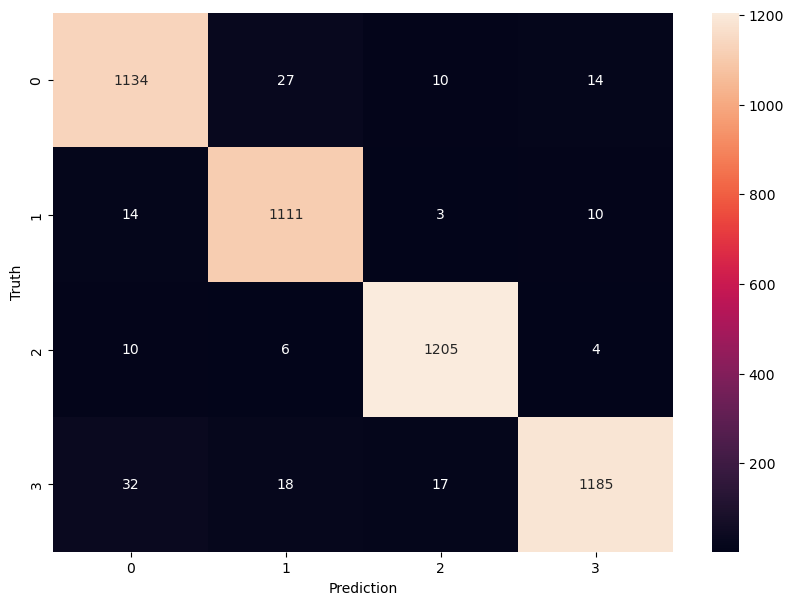

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [38]:
import lazypredict

from lazypredict.Supervised import LazyClassifier


#data = load_breast_cancer()
#X = data.data
#y= data.target

#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

AttributeError: 'Series' object has no attribute 'select_dtypes'

In [37]:
!pip install lazypredict

  Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 1.3/1.3 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 99.8/99.8 MB 1.3 MB/s eta 0:00:00
